In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

# Reading G-EQDSK files

/home/ltp511/workspace/FusionDLS/.venv/lib/python3.10/site-packages/freegs/fieldtracer.py:77: RuntimeWarning: invalid value encountered in divide
  alpha = (d * dr - b * dz) / det  # Location along line 1 [0,1]
/home/ltp511/workspace/FusionDLS/.venv/lib/python3.10/site-packages/freegs/fieldtracer.py:78: RuntimeWarning: divide by zero encountered in divide
  beta = (a * dz - c * dr) / det  # Location along line 2 [0,1]


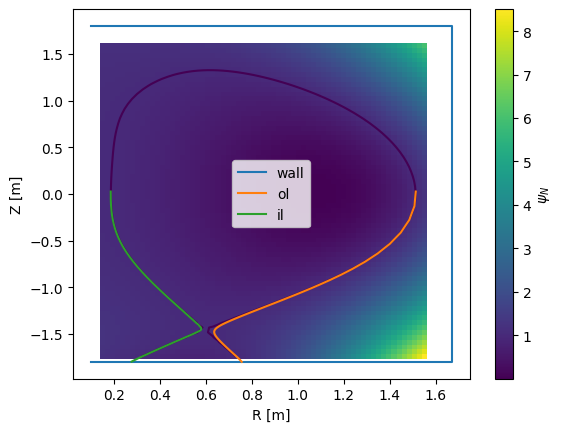

In [2]:
from pathlib import Path

from freeqdsk import geqdsk

from fusiondls import read_geqdsk

cwd = Path.cwd()
test_files = cwd.parents[1] / "tests" / "geqdsk_test_files"

single_null = test_files / "test_single-null.eqdsk"


def plot_field(path: Path):
    with path.open() as fh:
        data = geqdsk.read(fh)

    psi_n = (data.psi - data.simagx) / (data.sibdry - data.simagx)

    plt.pcolormesh(data.r_grid, data.z_grid, psi_n)
    plt.colorbar(label=r"$\psi_N$")
    plt.contour(data.r_grid, data.z_grid, psi_n, levels=[1.0])
    plt.xlabel("R [m]")
    plt.ylabel("Z [m]")

    # Plot walls
    # For some G-EQDSK files, the variables rlim and zlim are not present.
    # In these cases, a wall will need to be supplied by the user.
    # This is done by supplying a tuple of the R and Z coordinates along
    # the wall, where R and Z are 1D arrays:
    # >>> geometries = read_geqdsk(single_null, wall=(R, Z))
    assert data.rlim is not None
    assert data.zlim is not None
    plt.plot(data.rlim, data.zlim, label="wall")


plot_field(single_null)


def plot_field_lines(path: Path):
    # Get field lines
    geometries = read_geqdsk(path)
    # Geometries is a dictionary with the following keys:
    # - "ou" : outboard upper
    # - "ol" : outboard lower
    # - "iu" : inboard upper
    # - "il" : inboard lower
    # For the single null, only "ol" and "il" are present
    for leg in ("ol", "il", "ou", "iu"):
        if geometries[leg] is None:
            continue
        plt.plot(geometries[leg].R, geometries[leg].Z, label=leg)
    plt.legend()


plot_field_lines(single_null)

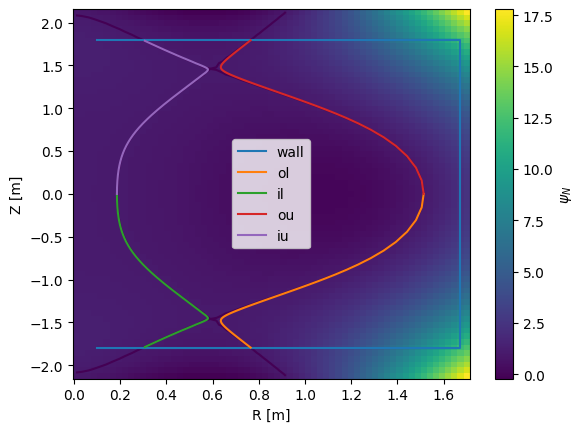

In [3]:
# The same can be done for a double-null equilibrium:
double_null = test_files / "test_connected-double-null.eqdsk"

plot_field(double_null)
plot_field_lines(double_null)

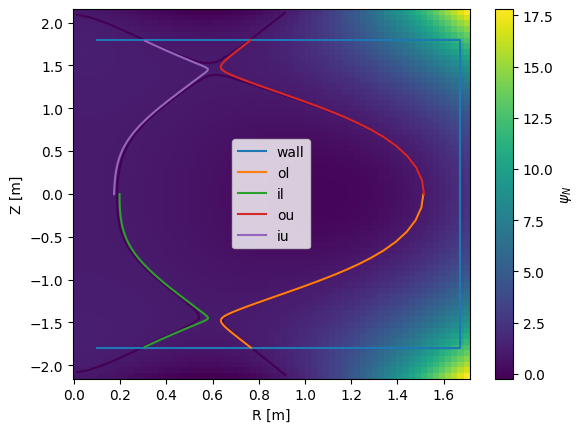

In [4]:
# ... and the same again for more complex geometries
disconnected_null = test_files / "test_disconnected-double-null.eqdsk"

plot_field(disconnected_null)
plot_field_lines(disconnected_null)

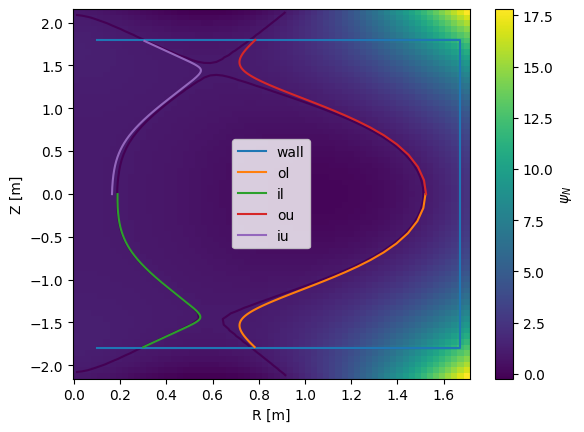

In [5]:
# It is also possible to customise the width of the scrape off layer.
# It may be necessary to tweak this parameter to get the desired field line.

plot_field(disconnected_null)

geometries = read_geqdsk(disconnected_null, solwidth=0.01)
plt.plot(geometries["ol"].R, geometries["ol"].Z, label="ol")
plt.plot(geometries["il"].R, geometries["il"].Z, label="il")
plt.plot(geometries["ou"].R, geometries["ou"].Z, label="ou")
plt.plot(geometries["iu"].R, geometries["iu"].Z, label="iu")
plt.legend()